In [822]:
import pandas as pd
import numpy as np

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib Notebook

In [99]:
import scipy.stats as stats
from scipy.stats import shapiro


In [116]:
import statsmodels.api as sm

In [120]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [832]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [518]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.optimizers import RMSprop


In [823]:
data=pd.read_csv("Mall_Customers.csv")

In [824]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [78]:
data.shape

(200, 5)

#The Dataset contains 5 Features and 200 observations 

In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Gender                    200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


#There are 4 features' Values of type int 
#and 1 feature's values of type object --> needs to get encoded 
#data contains no Null/missing Values 

In [80]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


#Age: 
#customers' age ranges from 18 to 70 y/o
#mean and median(50%) are slightly close --> No Outliers 

#Annual Income (k$) 
#Customers' annual income ranges from 15K$ to 137K$ 
#Customers who are 49 y/o and more earns more than 75% of other customers 
#and their spending score is 73 or higher 

#for all Features 
#_50% of Customers are more than 36 y/o, earn more than 61.5K$ per year 
#and have Spending Score more than 50


In [82]:
def box_plot(data,label):
    
    sns.set(style="whitegrid")
    sns.boxplot(data).set(xlabel=label)

<IPython.core.display.Javascript object>


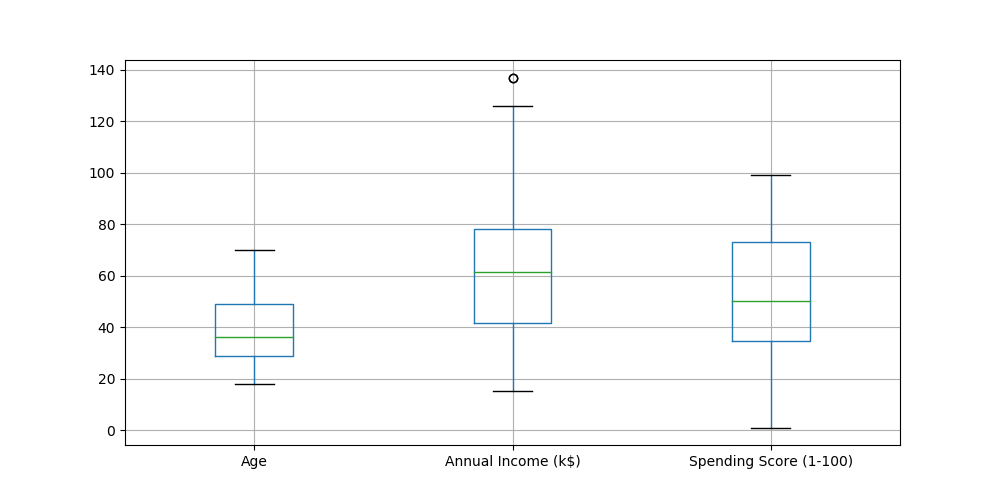

In [83]:
data.boxplot(["Age","Annual Income (k$)","Spending Score (1-100)"],figsize=(10,5))

In [84]:
#Age
#IQR from 28 to 48 
#50% of our Customers ranges from 28 to 48 y/o

#Annual Income (k$)
#IQR from 41 to 77 
#50% of our Customers` annual income ranges from 41 K$ to 77 K$
#it`s clear that Annual Income (k$) has an outlier (137)

#Spending Score (1-100)
#IQR from 34 to 72
#50% of our Customers have Spending Score from 34 to 72 points


<IPython.core.display.Javascript object>


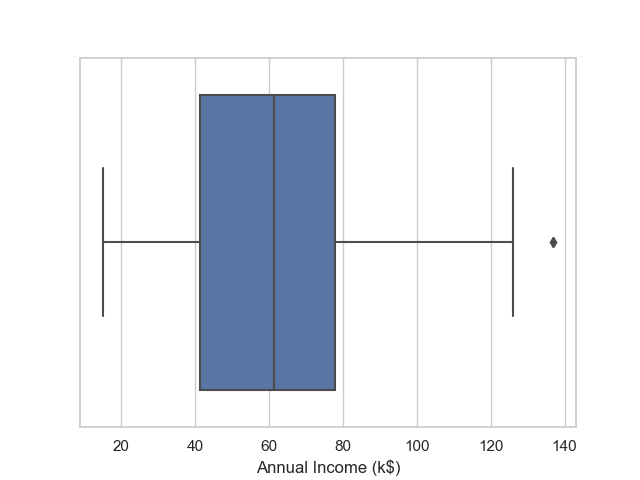

In [87]:
box_plot(data['Annual Income (k$)'],"Annual Income (k$)")

In [88]:
#Annual Income (K$)
#75% of our customers earns less than 78 K$ per year 

In [89]:
data[data["Annual Income (k$)"]==137]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
198,199,Male,32,137,18
199,200,Male,30,137,83


In [90]:
mean_w_o_outlier=np.mean(data.iloc[:198,3])
mean_w_outlier=np.mean(data.iloc[:,3])
median_w_o_outlier=np.median(data.iloc[:198,3])
median_w_outlier=np.median(data.iloc[:,3])

print("mean without the outliers",mean_w_o_outlier)
print("mean with the outliers",mean_w_outlier)
print("median without the outliers",median_w_o_outlier)
print("median with the outliers",median_w_outlier)

mean without the outliers 59.78787878787879
mean with the outliers 60.56
median without the outliers 61.0
median with the outliers 61.5


In [91]:
#since the difference between the mean,median with and without the outliers is very small 
#There for we can keep them
#"they have no effect on the mean and the median" 
#after research I found that 136 K$ per year is realistic number because salaries in this city are high

<IPython.core.display.Javascript object>


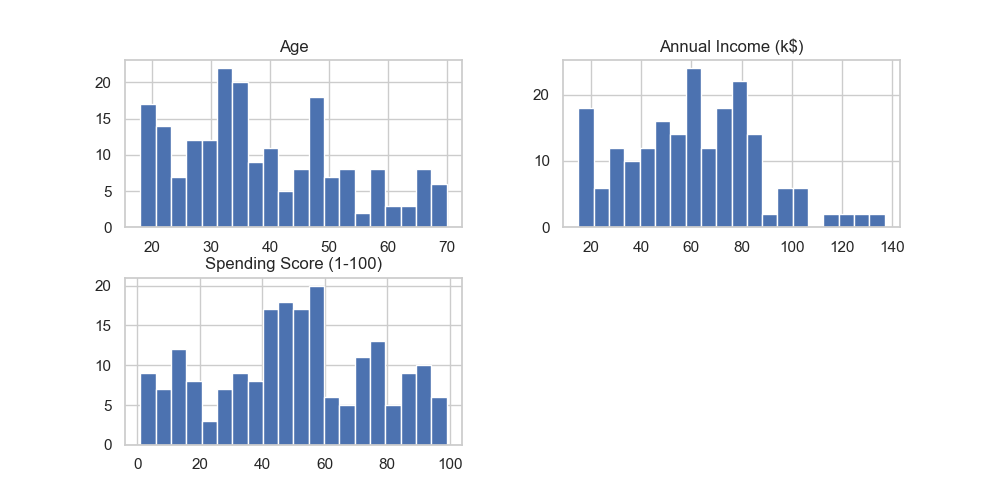

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002A4576A5C88>,
      dtype=object)

In [92]:
data.hist(["Age","Annual Income (k$)","Spending Score (1-100)"],figsize=(10,5),bins=20)

In [93]:
#most of our customers` are less than 50 y/o
#most of our cusmters earns less than 80 K$ per year
#spending score is normally distributed 

<IPython.core.display.Javascript object>


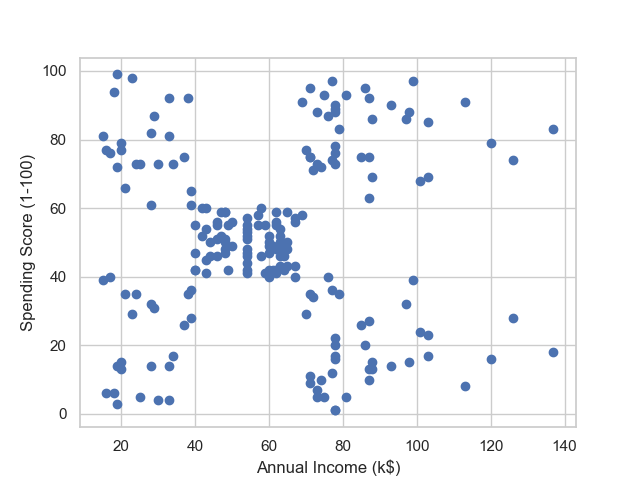

Text(0, 0.5, 'Spending Score (1-100)')

In [94]:
plt.scatter(data["Annual Income (k$)"],data["Spending Score (1-100)"])
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")

In [95]:
#there are 5 clusters 

In [96]:
male=data[data["Gender"]=="Male"]
female=data[data["Gender"]=="Female"]
female=female.sample(88,random_state=42)
len(female)

88

<IPython.core.display.Javascript object>


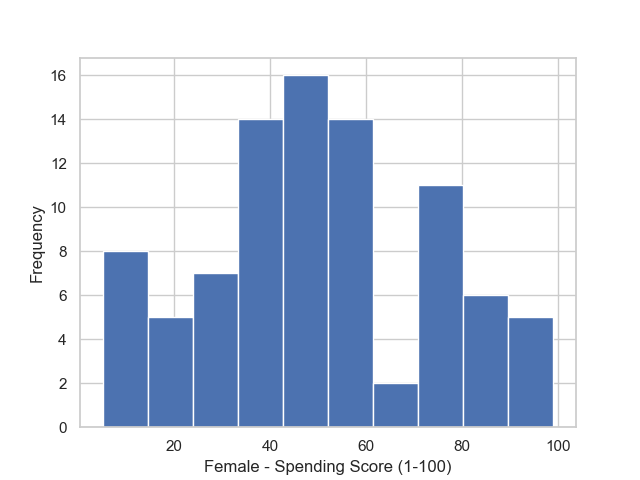

In [97]:
female["Spending Score (1-100)"].hist()
plt.xlabel("Female - Spending Score (1-100)")
plt.ylabel("Frequency")
plt.show()

<IPython.core.display.Javascript object>


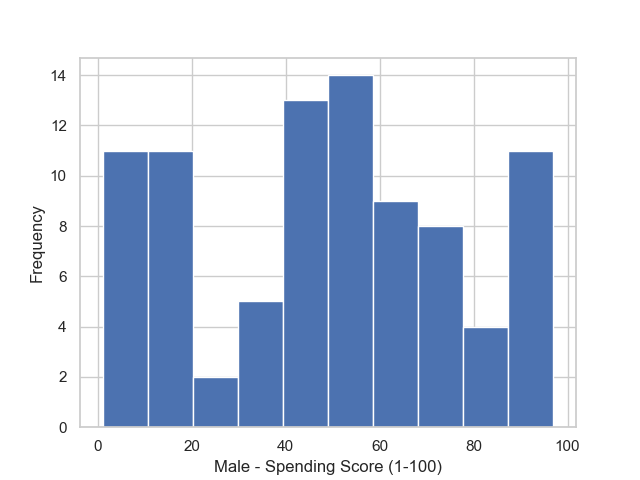

In [98]:
male["Spending Score (1-100)"].hist()
plt.xlabel("Male - Spending Score (1-100)")
plt.ylabel("Frequency")
plt.show()

769.3862345041322

572.3004907024797

In [101]:
stat,p_male=shapiro(male["Spending Score (1-100)"])
stat,p_female=shapiro(female["Spending Score (1-100)"])

stat_data,p_data=shapiro(data["Spending Score (1-100)"])
p_male

0.0026273364201188087

In [102]:
#testing normality 
#for males and all data 
#p-value is less than alpha .05 so it is not normally distributed  
#for females 
#p-value is more than .05 so it is normally distibuted 
#but still we can try using one-way ANOVA and Kruskal-Wallis tests

In [103]:
# Question 
# Does the gender of customers affect Spending Score ?

In [104]:
#H0 :  the gender does not affect Spending Score 
#H1 : the gender affects Spending Score  
#alpha= .05

In [105]:
stats.f_oneway(male["Spending Score (1-100)"],female["Spending Score (1-100)"])

F_onewayResult(statistic=0.15946337745964337, pvalue=0.6901407573084232)

In [106]:
stats.kruskal(male["Spending Score (1-100)"],female["Spending Score (1-100)"])


KruskalResult(statistic=0.026977438382298234, pvalue=0.8695358368390939)

In [107]:
#Results : one-way ANOVA and Kruskal-Wallis tests have pvalue greater than .05 
#pvalue > alpha 
#0.57 or 0.41 > .05
#therefore we will accept the Null Hypothesis

In [108]:
# Q is the average spending score for male customers differ from female customers ?

In [109]:
#H0: the mean spending score for male customers equals the mean of female customer 
#H1: the mean spending score for male customers does not equal the mean of female customers

In [889]:
stats.ttest_ind(male["Spending Score (1-100)"],female["Spending Score (1-100)"])

Ttest_indResult(statistic=-0.39932865845020926, pvalue=0.6901407573084256)

In [113]:
#Results : Welch’s t-test have pvalue greater than .05 
#pvalue > alpha 
#0.69 > .05
#therefore we will accept the Null Hypothesis
#the mean spending score for male customers equals the mean of female customer

In [114]:
# Q is the Annual Income a good variable to predict the Spending Score ?

In [115]:
#H0: The coefficients are zero (no relation between the two variables)
#H1: The coefficients are not zero (there is a relation between the two variables)

In [117]:
est = sm.OLS(data["Spending Score (1-100)"],data["Annual Income (k$)"])
est2 = est.fit()
print(est2.summary())

                                   OLS Regression Results                                  
Dep. Variable:     Spending Score (1-100)   R-squared (uncentered):                   0.670
Model:                                OLS   Adj. R-squared (uncentered):              0.668
Method:                     Least Squares   F-statistic:                              403.5
Date:                    Thu, 17 Oct 2019   Prob (F-statistic):                    9.26e-50
Time:                            13:08:42   Log-Likelihood:                         -979.58
No. Observations:                     200   AIC:                                      1961.
Df Residuals:                         199   BIC:                                      1964.
Df Model:                               1                                                  
Covariance Type:                nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      

In [118]:
#Results : regression analysis test has pvalue of 0 
#pvalue < alpha 
#0 < .05
#therefore we will REJECT the Null Hypothesis
#there is a relation between the two variables 
#We can use the Annual Income to predict the Spending Score 

In [119]:
est = sm.OLS(data["Spending Score (1-100)"],data["Age"])
est2 = est.fit()
print(est2.summary())

                                   OLS Regression Results                                  
Dep. Variable:     Spending Score (1-100)   R-squared (uncentered):                   0.619
Model:                                OLS   Adj. R-squared (uncentered):              0.618
Method:                     Least Squares   F-statistic:                              323.9
Date:                    Thu, 17 Oct 2019   Prob (F-statistic):                    1.28e-43
Time:                            13:08:47   Log-Likelihood:                         -993.76
No. Observations:                     200   AIC:                                      1990.
Df Residuals:                         199   BIC:                                      1993.
Df Model:                               1                                                  
Covariance Type:                nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-

In [ ]:
#encode Male and Female Labels to 0 1 

In [847]:
def encoding_labels(data_,col_name,file_name):
    """this function takes the DataFrame, column name and the file name
    then encodes the catigorical variable using LabelEncoder & OneHotEncoder 
    and save the new data frame to a csv file 
    then returns the encoder instance and the Dataframe with the encoded variable"""
    
    data_lbl=data_.copy()
    data_pure=data_.copy()

    gender_encoding=LabelEncoder()
    gender_labels=gender_encoding.fit_transform(data_pure["Gender"])
    
    encoding_objects={}
    
    for cols in data_pure.columns:
        if data_pure[cols].dtype=="object":
            encoding_objects[cols]=LabelEncoder()
            data_pure[cols]=encoding_objects[cols].fit_transform(data_pure[cols])
            
    #print(encoding_objects)
    
    gender_lbl_enc=LabelEncoder()
    gender_1_hot_enc=OneHotEncoder()
    
    data_lbl["Gender"]=gender_lbl_enc.fit_transform(data_lbl["Gender"])
    gender_values=gender_1_hot_enc.fit_transform(data_lbl["Gender"].values.reshape(-1,1)).toarray()
    
    #print(gender_values)
    #print(data_lbl["Gender"])
    
    cols_gender=gender_lbl_enc.inverse_transform(data_lbl["Gender"].unique())
    for i in range(len(cols_gender)):
        data_lbl[cols_gender[i]]=gender_values[:,i]
    #print(cols_gender)
    
    data_lbl.to_csv(file_name,index=False)
    
    return gender_lbl_enc, data_lbl

In [ ]:
#retrieve the labels Female and male 

In [323]:
def inverse_labels_to_csv(data_,col_name,encoder_,file_name):
    """Function that takes the dataFrame, Column name, encoder instance, and file name 
    then saves the new Dataframe with the Catigorical Labels(Male&Female)"""
    
    data_fm=data_.copy()
    data_fm[col_name]=encoder_.inverse_transform(data_fm[col_name])
    
    data_fm.to_csv(file_name,index=False)
    

In [ ]:
#creating elbow graph to choose the best k 

In [370]:
def elbow_Validation(x_train,k):
    """this function takes x_train set and the number of clusters to be validated 
    then show a graph to choose the best number of clusters (elbow method) """
    ks=range(1,10)
    inertias=[]
    for k in ks:
        model=KMeans(n_clusters=k)
        model.fit(X_train)
        inertias.append(model.inertia_)
    plt.plot(ks,inertias,"-o")
    plt.xlabel("number of clusters")
    plt.ylabel("inertia")
    plt.show()
    

In [ ]:
#predting classes using Kmeans 

In [851]:
def kmeans_Clustering_predict(x_train,x_test,the_best_k_):
    pipe=make_pipeline(KMeans(n_clusters=5))
    pipe.fit(X_train)
    y_pred=pipe.predict(X_test)
    y_pred

    return y_pred, pipe
    

In [ ]:
#showing Kmeans graph 

In [381]:
def kmeans_Clustering_graph(x_test,x,y,y_predd):
    plt.scatter(X_test["Annual Income (k$)"],X_test["Spending Score (1-100)"],c=y_predd,marker='x')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()

In [886]:
def data_labeling(data_,pipe_):
    """this function takes the dataframe and the pipe
    and label it then saves and returns the labeld data frame"""
    data_predict=data_.iloc[:,2:]
    labeled_dataframe=data_.copy()
    labeled_dataframe["Labels"]=0
    new_labls=pipe_.predict(data_predict)
    for i in range(200):
        labeled_dataframe.iloc[i,5]=new_labls[i]
    labeled_dataframe.to_csv("My_labeld_data",index=False)
    return labeled_dataframe
    

In [ ]:
# file name to save the encoded dataframe the is in form of 0 1 (One hot Encoder)

In [846]:
file_name_1= "Customers_Data_encoded____"

In [849]:
encdr,my_dattta=encoding_labels(data,"Gender",file_name_1)

D:\programs\anaconda\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [888]:
my_dattta.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Male,Female
0,1,1,19,15,39,0.0,1.0
1,2,1,21,15,81,0.0,1.0
2,3,0,20,16,6,1.0,0.0
3,4,0,23,16,77,1.0,0.0
4,5,0,31,17,40,1.0,0.0


In [ ]:
#both the original data frame and the labeled data frame can be used 
#as the gender column will not be fed to the model (it reduces the Kmeans performance)
#here I will use the original data to train, test and label the dataframe

In [ ]:
#feature selection (Age, Annual Income, Spending Score)

In [833]:
data_mdl=data.iloc[:,2:]

In [ ]:
#deviding the dataset into .8 Training Set and .2 Testing Set 

In [834]:
X_train =  data_mdl.sample(160,random_state=42)
X_test =  data_mdl.sample(40,random_state=42)

In [ ]:
#using elbow method we can choose the K with low inertia

<IPython.core.display.Javascript object>


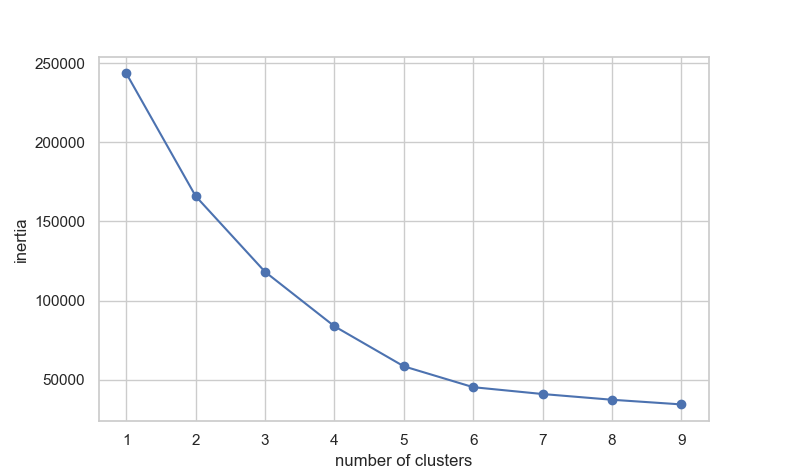

In [388]:
elbow_Validation(X_train,10)

In [ ]:
#the best choice is K=5 

In [850]:
k=5

In [ ]:
#calling kmeans_Clustering_predict will predict the outcome of the test set 

In [853]:
y_p,m_pipe=kmeans_Clustering_predict(X_train,X_test,k)
m_pipe

Pipeline(memory=None,
         steps=[('kmeans',
                 KMeans(algorithm='auto', copy_x=True, init='k-means++',
                        max_iter=300, n_clusters=5, n_init=10, n_jobs=None,
                        precompute_distances='auto', random_state=None,
                        tol=0.0001, verbose=0))],
         verbose=False)

In [ ]:
#calling kmeans_Clustering_graph and feeding it the predected values for the test set y_p 
#will show a graph of clustered data 

<IPython.core.display.Javascript object>


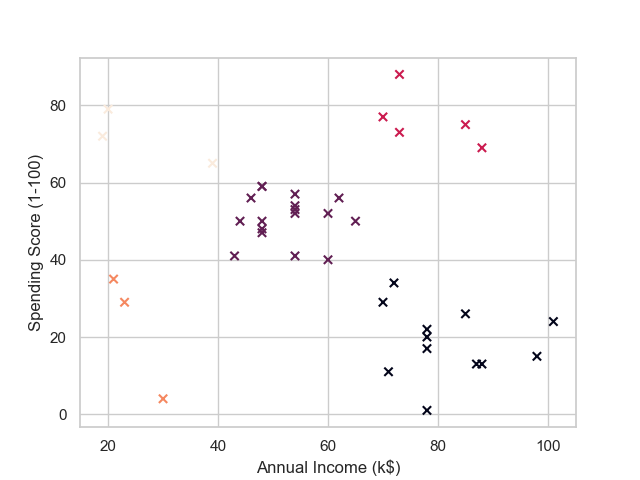

In [387]:
kmeans_Clustering_graph(X_test,"Annual Income (k$)","Spending Score (1-100)",y_p)

In [ ]:
# calling data_labeling and feeding it the data & the instance of the model (m_pipe) will label the dataframe 

In [887]:
lb_df=data_labeling(data,m_pipe)
lb_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Labels
0,1,Male,19,15,39,0
1,2,Male,21,15,81,3
2,3,Female,20,16,6,0
3,4,Female,23,16,77,3
4,5,Female,31,17,40,0


In [ ]:
#retrieve the original categories for Gender columns and save the dataframe with Gender (Female,Male) and Labels(0,1,2,3,4)
#only incase we used the data frame with encoded gender values 

In [848]:
file_name_2="Customers_Data_Full______"

In [361]:
inverse_labels_to_csv(my_dattta,"Gender",encdr,file_name_2)

'Customers_Data_Full'

In [ ]:
#reading the labeled data 

In [298]:
c_data=pd.read_csv("Mall_Customers_labeld.csv")

In [299]:
c_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Label
0,1,1,19,15,39,2
1,2,1,21,15,81,3
2,3,0,20,16,6,2
3,4,0,23,16,77,3
4,5,0,31,17,40,2


In [ ]:
#Randomize and dividing the dataset into Training and testing sets for the features and labels 

In [636]:
data_cnnnn=c_data.copy()
data_n=data_cnnnn.sample(frac=1,random_state=42)
X_train_NN=data_n.iloc[0:160,2:5]
X_test_NN=data_n.iloc[160:,2:5]
labels_train = data_n.iloc[0:160,5]
labels_test = data_n.iloc[160:,5]


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Label
95,96,1,24,60,52,1
15,16,1,22,20,79,3
30,31,1,60,30,4,2
158,159,1,34,78,1,4
128,129,1,59,71,11,4
115,116,0,19,65,50,1
69,70,0,32,48,47,1
170,171,1,40,87,13,4
174,175,0,52,88,13,4
45,46,0,24,39,65,3


In [ ]:
#converting the labels into binary representaion EX : 0 1 0 0 0

In [637]:
y_train_binary = to_categorical(labels_train)
y_test_binary = to_categorical(labels_test)

len(y_test_binary)

40

In [ ]:
#creating a sequential model and tuning the parameters 
#the best Learning rate is .02

In [789]:
opt = RMSprop(lr=0.02, decay=1e-6)

model = Sequential()
model.add(Dense(5,activation='relu',input_dim=3))
model.add(Dense(5, activation='sigmoid'))
model.add(Dense(5, activation='sigmoid'))
#model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])
model.fit(X_train_NN,y_train_binary,epochs=10,batch_size=5)
#print(model.summary())
score = model.evaluate(X_test_NN,y_test_binary,batch_size=5)
print("accuracy=",score[1]*100,"loss=",score[0])

Epoch 1/10
160/160 [==============================] - 0s 834us/step - loss: 1.4594 - accuracy: 0.3750
Epoch 2/10
160/160 [==============================] - 0s 368us/step - loss: 1.2770 - accuracy: 0.4062
Epoch 3/10
160/160 [==============================] - 0s 411us/step - loss: 1.1731 - accuracy: 0.5437
Epoch 4/10
160/160 [==============================] - 0s 430us/step - loss: 0.9911 - accuracy: 0.5813
Epoch 5/10
160/160 [==============================] - 0s 480us/step - loss: 0.9030 - accuracy: 0.5938
Epoch 6/10
160/160 [==============================] - 0s 430us/step - loss: 0.8152 - accuracy: 0.6375
Epoch 7/10
160/160 [==============================] - 0s 418us/step - loss: 0.7354 - accuracy: 0.7188
Epoch 8/10
160/160 [==============================] - 0s 486us/step - loss: 0.6999 - accuracy: 0.7312
Epoch 9/10
160/160 [==============================] - 0s 405us/step - loss: 0.6555 - accuracy: 0.8000
Epoch 10/10
40/40 [==============================] - 0s 799us/step
accuracy= 94.99

In [ ]:
#predicting labels for the test set 

In [790]:
model.predict_classes(X_test_NN)

array([0, 4, 0, 0, 1, 1, 1, 1, 4, 1, 1, 1, 3, 1, 4, 4, 1, 3, 0, 0, 3, 1,
       0, 4, 0, 1, 1, 1, 1, 1, 1, 0, 1, 4, 1, 1, 2, 1, 0, 1], dtype=int64)

In [661]:
labels_test

175    0
134    4
167    0
183    0
63     1
54     1
107    1
50     1
196    4
58     1
48     1
88     1
21     3
57     1
160    4
192    4
129    0
37     3
157    0
193    0
1      3
52     1
149    0
130    4
151    0
103    1
99     1
116    1
87     1
74     1
121    1
199    0
20     2
188    4
71     1
106    1
14     2
92     1
179    0
102    1
Name: Label, dtype: int64

In [ ]:
#Saving the model as pickle 

In [593]:
import pickle

In [792]:
with open("model____.pickle","wb") as f:
    pickle.dump(model,f)

In [ ]:
#loading the saved model to predict new instances 

In [794]:
with open("model8BEST.pickle","rb") as f:
    md=pickle.load(f)

In [817]:
m=[[40,75,66],]
m_array=np.array(m)
m_array.shape

(1, 3)

In [ ]:
#the greatest probability is the predicted class 
# the result will be class 2 

In [818]:
md.predict(m_array)

array([[0.08337557, 0.10195087, 0.00227569, 0.00432716, 0.00183362]],
      dtype=float32)